In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


from wordcloud import WordCloud
import nltk
import re
import string
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crisj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crisj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# 4.2. Import the data:
data=pd.read_excel("D:\python\THESIS\dataset1.xlsx")
data
#data.head()
#print(data.head())

Content  \
0                                                                                                                                                                                                                                                                                                                   string   
1                                                                                                                                                                                                                                                                                                                     meta   
2                                                                                                                                                                                                                                           #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3                                                                                                                                                                                                     G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4                                                                                                                                                                                                             Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   
...                                                                                                                                                                                                                                                                                                                    ...   
1497                                                                                                                                                                                                  At G20 summit, PM Modi calls for dialogue and diplomatic solution to Ukraine war: Key points https://t.co/qWIRz9JJvV   
1498                                                        ONGOING: The #KampalaGeopolitics panel on the global impact of the Ukraine war examining the political and economic repercussions in an African perspective. The moderator is BBC Komla Dumor award winner @SolomonSerwanjj.\n#KGC2022 https://t.co/owEGIl6hsE   
1499                                                                                                                                                  @DefenceHQ Russia-Ukraine war: Key things to know  https://t.co/7VH8Fi8D4k      \n\n#RussiaIsATerroristState #RussianWarCrimes #StandWithUkraine #BanRussianTourists   
1500                                                                                                                                                                                                             G20: Macron calls for China and France to unite against Ukraine war\nhttps://t.co/hjCVa4lqfC\n#NewsInVids   
1501  Modi in G20 summit: 'Should find way to return to ceasefire &amp; diplomacy,' says PM on Ukraine war Prime Minister Narendra Modi on the sidelines of G20 summit called on for the path of ceasefire &amp; diplomacy to end the ongoing Russia-Ukraine. The annual G20 Summit opened on Tue… https://t.co/N0fvFja3QW   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [45]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', None)
data= data
data.head()

Content  \
0                                                                                                                string   
1                                                                                                                  meta   
2                                        #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3  G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4          Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [46]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['Content'].apply(lambda x:remove_punctuation(x))
data.head()

Content  \
0                                                                                                                string   
1                                                                                                                  meta   
2                                        #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3  G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4          Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [48]:
# Remove pattern function
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [49]:
# Remove emoticons from column 'Author'
data['Author'] = data['Author'].str.replace("[^\w()'+]", " ")
data

C:\Users\crisj\AppData\Local\Temp\ipykernel_15324\402358318.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Author'] = data['Author'].str.replace("[^\w()'+]", " ")


Content  \
0                                                                                                                                                                                                                                                                                                                   string   
1                                                                                                                                                                                                                                                                                                                     meta   
2                                                                                                                                                                                                                                           #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3                                                                                                                                                                                                     G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4                                                                                                                                                                                                             Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   
...                                                                                                                                                                                                                                                                                                                    ...   
1497                                                                                                                                                                                                  At G20 summit, PM Modi calls for dialogue and diplomatic solution to Ukraine war: Key points https://t.co/qWIRz9JJvV   
1498                                                        ONGOING: The #KampalaGeopolitics panel on the global impact of the Ukraine war examining the political and economic repercussions in an African perspective. The moderator is BBC Komla Dumor award winner @SolomonSerwanjj.\n#KGC2022 https://t.co/owEGIl6hsE   
1499                                                                                                                                                  @DefenceHQ Russia-Ukraine war: Key things to know  https://t.co/7VH8Fi8D4k      \n\n#RussiaIsATerroristState #RussianWarCrimes #StandWithUkraine #BanRussianTourists   
1500                                                                                                                                                                                                             G20: Macron calls for China and France to unite against Ukraine war\nhttps://t.co/hjCVa4lqfC\n#NewsInVids   
1501  Modi in G20 summit: 'Should find way to return to ceasefire &amp; diplomacy,' says PM on Ukraine war Prime Minister Narendra Modi on the sidelines of G20 summit called on for the path of ceasefire &amp; diplomacy to end the ongoing Russia-Ukraine. The annual G20 Summit opened on Tue… https://t.co/N0fvFja3QW   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [50]:
# Remove Twitter Handles
data['Tidy_Content'] = np.vectorize(remove_pattern)(data['Content'], "@[\w]*")
data.head()

Content  \
0                                                                                                                string   
1                                                                                                                  meta   
2                                        #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3  G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4          Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [51]:
# Remove links
data['Tidy_Content'] = data['Tidy_Content'].str.replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ")
data.head()

# text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

C:\Users\crisj\AppData\Local\Temp\ipykernel_15324\4239762973.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tidy_Content'] = data['Tidy_Content'].str.replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ")


Content  \
0                                                                                                                string   
1                                                                                                                  meta   
2                                        #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3  G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4          Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [52]:
# Remove special characters, numbers, punctuations (except exclamation mark)
data['Tidy_Content'] = data['Tidy_Content'].str.replace("[^a-zA-Z#!]", " ")
data.head()

C:\Users\crisj\AppData\Local\Temp\ipykernel_15324\627592959.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tidy_Content'] = data['Tidy_Content'].str.replace("[^a-zA-Z#!]", " ")


Content  \
0                                                                                                                string   
1                                                                                                                  meta   
2                                        #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3  G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4          Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

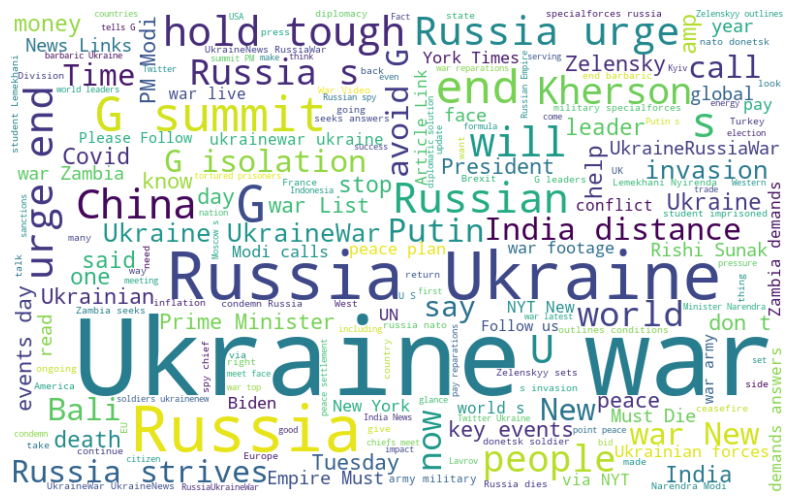

In [53]:
# WordCloud
all_words = ' '.join([text for text in data['Tidy_Content']])

wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white',  max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
# Hashtags mentions

def hashtag_extract(x):
  hashtags = []
  
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
    
  return hashtags

# Extract hashtags

hashtags = hashtag_extract(data['Tidy_Content'])

# Unnesting list

hashtags = sum(hashtags, [])

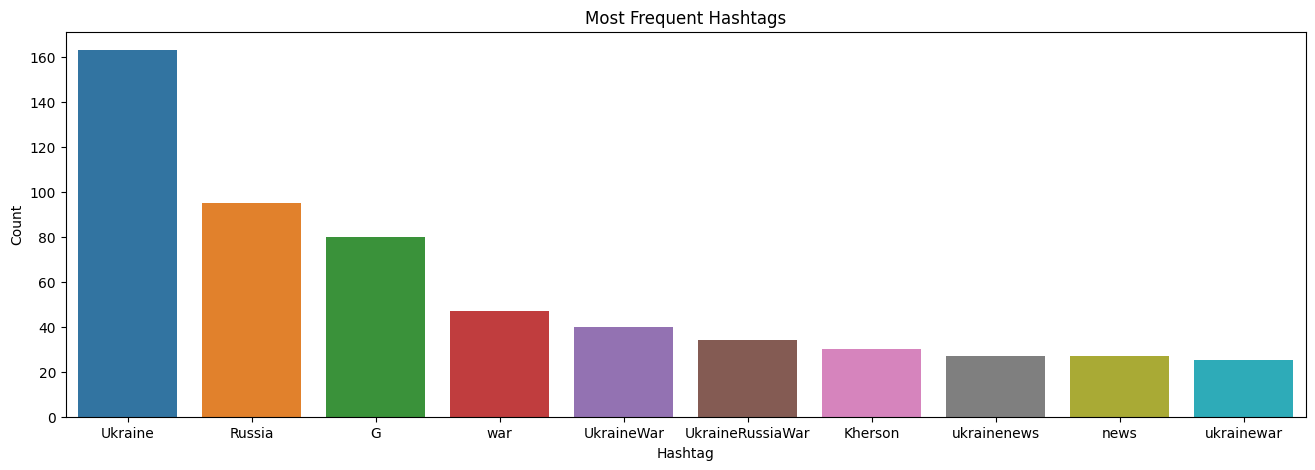

In [55]:
# Frequency Distribution

freq_dist = nltk.FreqDist(hashtags)

graph = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})

# Top 10 Most Frequent Hashtags

graph = graph.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=graph, x="Hashtag", y="Count")
axis.set(ylabel='Count')
plt.title('Most Frequent Hashtags')
plt.show()

In [56]:
# Calculate Polarity

analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in data['Tidy_Content']:
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

data['Compound'] = scores['compound']
data['Negative'] = scores['neg']
data['Neutral'] = scores['neu']
data['Positive'] = scores['pos']
data.head()

Content  \
0                                                                                                                string   
1                                                                                                                  meta   
2                                        #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3  G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4          Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [57]:
# Calculate Mentions

def word_extract(x):
  words = []
  
  for i in x:
    ht = re.findall(r"(\w+)", i)
    words.append(ht)
    
  return words

# Extract words

words = word_extract(data['Tidy_Content'])

# words

# Unnesting list

words = sum(words, [])

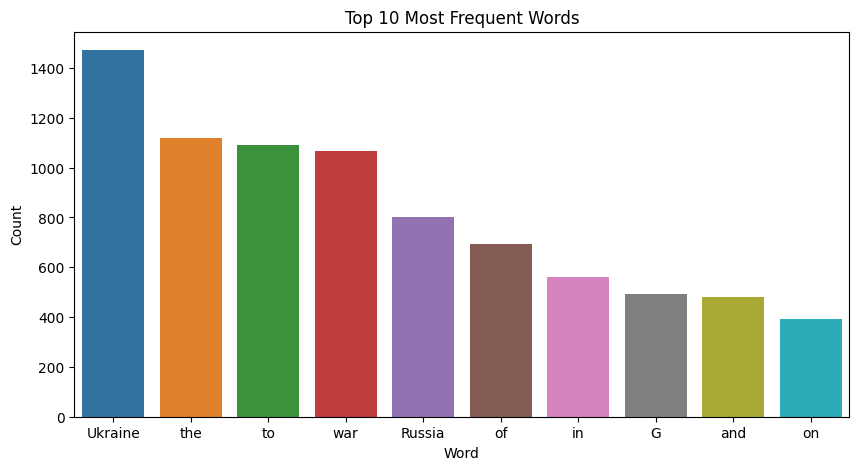

In [58]:
# Frequency Distribution

a = nltk.FreqDist(words)

b = pd.DataFrame({'Word': list(a.keys()), 'Count': list(a.values())})
length = len(b)

# Top 10 Most Frequent Words
b = b.nlargest(columns="Count", n = 10)
plt.figure(figsize=(10,5))
axis = sns.barplot(data=b, x='Word', y='Count')
axis.set(ylabel='Count')
plt.title('Top 10 Most Frequent Words')
plt.show()

In [59]:
# Set type of polarity
polarity = []

for i in range(len(data)):
  if (data['Compound'][i] < 0):
    polarity.append("Negative")
  elif (data['Compound'][i] > 0):
    polarity.append("Positive")
  else:
    polarity.append("Neutral")
    
polarity = pd.DataFrame(polarity)
data['Polarity'] = polarity
data.head()

Content  \
0                                                                                                                string   
1                                                                                                                  meta   
2                                        #Explosions in #Kyiv \n#Details later\n\n#Ukraine #war https://t.co/OUIojVKwpp   
3  G20: Zelenskiy calls for ‘just’ end to Ukraine war, with no compromises – video | World news https://t.co/Ftc2GjlJYs   
4          Ukraine War Is Driving “a Gold Rush to New Fossil Fuel Infrastructure” https://t.co/lnSvYIKLDd via @truthout   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             